<a href="https://colab.research.google.com/github/beastkp/Heart_failure_prediction/blob/main/Heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("/content/Heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
data.shape

(299, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.837237,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.900919,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#Exploratory Data Analysis

Total living cases :  203
Total Death Cases:  96


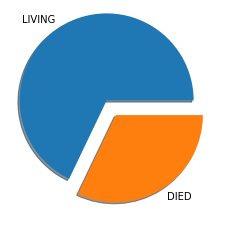

In [9]:
len_live = len(data["DEATH_EVENT"][data.DEATH_EVENT == 0])
len_dead = len(data["DEATH_EVENT"][data.DEATH_EVENT == 1])

arr = np.array([len_live,len_dead])
labels=['LIVING','DIED']
print("Total living cases : ",len_live)
print("Total Death Cases: ",len_dead)

plt.pie(arr,labels=labels,explode= [0.2,0.0], shadow =True)
plt.show()

#imbalanced data as more living cases then dead model can be biased, data is not equally distributed between classes

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

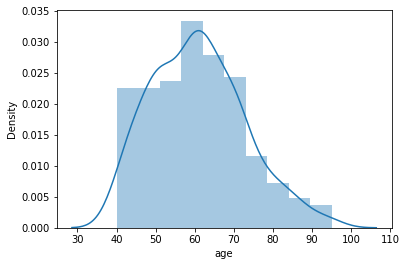

In [10]:
sns.distplot(data["age"])
plt.plot()

In [11]:
males = len(data["sex"][data.sex == 1])
females = len(data["sex"][data.sex ==0])
print("No of Males = ",males)
print("No of FEmales = ",females)



No of Males =  194
No of FEmales =  105


age above 50 not dead =  167
Age above 50 dead =  85


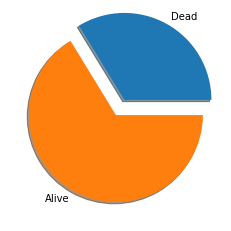

In [12]:
# selecting rows that are above 50 and died
age_above_50_not_dead = data["DEATH_EVENT"][data.age>=50][data.DEATH_EVENT == 0]
age_above_50_dead = data["DEATH_EVENT"][data.age>=50][data.DEATH_EVENT == 1]

len_died = len(age_above_50_dead)
len_alive = len(age_above_50_not_dead)

arr1 = [len_died,len_alive]
labels= ["Dead","Alive"]

print("age above 50 not dead = ",len_alive)

print("Age above 50 dead = ",len_died)
plt.pie(arr1,labels=labels,explode = [0.2,0.0], shadow=True)
plt.show()

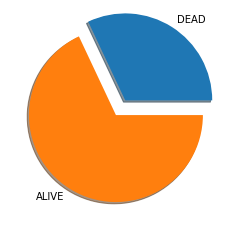

In [13]:
patient_with_diabetes_dead = data["DEATH_EVENT"][data.diabetes == 1][data.DEATH_EVENT ==1]
patient_with_diabetes_alive = data["DEATH_EVENT"][data.diabetes == 1][data.DEATH_EVENT == 0]

len_DD = len(patient_with_diabetes_dead)
len_DA = len(patient_with_diabetes_alive)

arr2 = [len_DD,len_DA]
labels = ["DEAD","ALIVE"]

plt.pie(arr2,labels=labels,explode =[0.2,0.0],shadow=True)
plt.show()

<AxesSubplot:>

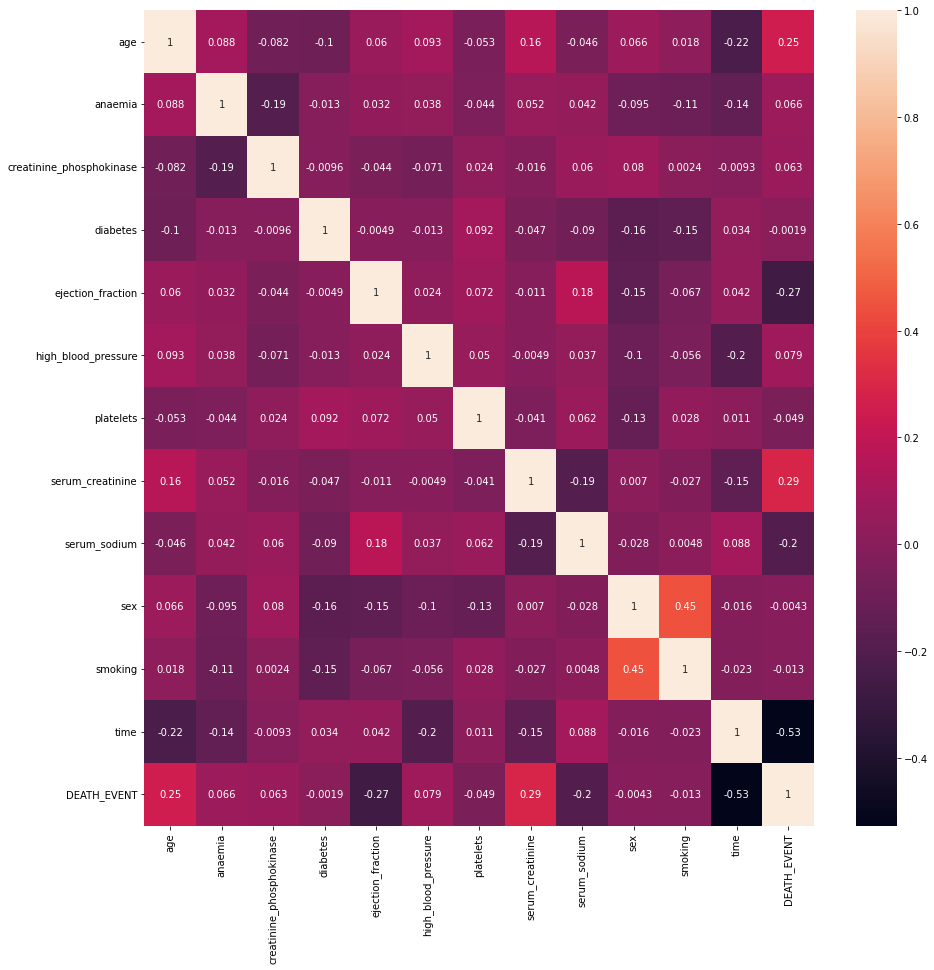

In [14]:
#checking co-relation
corr = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True)

In [15]:
#correlation ranges form -1 to 1, if values are closer to 0 there is no linear trend (no linear regression)
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088284,-0.081601,-0.101199,0.060351,0.093034,-0.052951,0.159080,-0.045982,0.065603,0.018465,-0.224379,0.254008
anaemia,0.088284,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081601,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101199,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060351,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093034,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052951,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159080,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045982,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065603,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


#Dataset Creation

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop("DEATH_EVENT",axis =1)
y = data["DEATH_EVENT"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print("Shape of X_train ",X_train.shape)
print("Shape of X_test ",X_test.shape)
print("Shape of y_train ",y_train.shape)
print("Shape of y_test ",y_test.shape)

Shape of X_train  (209, 12)
Shape of X_test  (90, 12)
Shape of y_train  (209,)
Shape of y_test  (90,)


#Feature Engineering

In [18]:
def add_interactions(X):
  features = X.columns
  m = len(features)
  X_int = X.copy(deep=True)

  for i in range(m):
    feature_i_name = features[i]

    feature_i_data = X[feature_i_name]
    for j in range(i+1,m):
      feature_j_name = features[j]
      feature_j_data = X[feature_j_name]
      feature_i_j_name = feature_i_name+"_x_"+feature_j_name
      X_int[feature_i_j_name]= feature_i_data*feature_j_data

  return X_int
x_train_mod = add_interactions(X_train)
x_test_mod = add_interactions(X_test)


In [19]:
x_train_mod

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_x_serum_sodium,serum_creatinine_x_sex,serum_creatinine_x_smoking,serum_creatinine_x_time,serum_sodium_x_sex,serum_sodium_x_smoking,serum_sodium_x_time,sex_x_smoking,sex_x_time,smoking_x_time
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,...,367.2,2.7,2.7,675.0,136,136,34000,1,250,250
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,...,156.2,0.0,0.0,36.3,0,0,4686,0,0,0
241,65.0,0,582,1,30,0,249000.0,1.3,136,1,...,176.8,1.3,1.3,275.6,136,136,28832,1,212,212
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,...,126.0,0.0,0.0,156.6,0,0,24360,0,0,0
152,50.0,0,115,0,45,1,184000.0,0.9,134,1,...,120.6,0.9,0.9,106.2,134,134,15812,1,118,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,0,572,1,35,0,231000.0,0.8,143,0,...,114.4,0.0,0.0,172.0,0,0,30745,0,0,0
192,50.0,1,121,1,40,0,260000.0,0.7,130,1,...,91.0,0.7,0.0,122.5,130,0,22750,0,175,0
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,...,441.6,0.0,0.0,300.8,0,0,12972,0,0,0
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,...,82.8,0.6,0.6,24.0,138,138,5520,1,40,40


#Building Model

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

def evaluating_model(y_test, y_pred):
  print("Accuracy score = ",accuracy_score(y_test,y_pred))
  print("Precision_score = ",precision_score(y_test,y_pred))
  print("Recall Score = ",recall_score(y_test,y_pred))
  print("Confusion matrix = ",confusion_matrix(y_test,y_pred))

In [21]:
#building logistic_regression as baseline model

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)

lr_clf_pred = lr_clf.predict(X_test)

In [22]:
y_pred = lr_clf.predict(X_test)
evaluating_model(y_test,y_pred)

Accuracy score =  0.7888888888888889
Precision_score =  0.7647058823529411
Recall Score =  0.4642857142857143
Confusion matrix =  [[58  4]
 [15 13]]


In [23]:
#Logistic REgression with standard scaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(),LogisticRegression())
lr_clf_pip.fit(X_train,y_train)

y_pred1 = lr_clf_pip.predict(X_test)  
evaluating_model(y_test,y_pred1)

Accuracy score =  0.8111111111111111
Precision_score =  0.7894736842105263
Recall Score =  0.5357142857142857
Confusion matrix =  [[58  4]
 [13 15]]


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#define the parameter range
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose = 3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [26]:
svc = SVC(C=10,gamma=0.0001)
svc.fit(X_train,y_train)
y_pred2 = svc.predict(X_test)
evaluating_model(y_test,y_pred2)
#performs with slightly less accuracy than logistic regression

Accuracy score =  0.6777777777777778
Precision_score =  0.4
Recall Score =  0.07142857142857142
Confusion matrix =  [[59  3]
 [26  2]]


#Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params,runs=20,clf = DecisionTreeClassifier(random_state=2)):
  rand_clf = RandomizedSearchCV(clf,params,n_iter =runs,cv=5,n_jobs=-1,random_state=2)
  rand_clf.fit(X_train,y_train)
  best_model = rand_clf.best_estimator_
  best_score = rand_clf.best_score_

  print("Training Score = {:.3f}".format(best_score))
  y_pred = best_model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print("Test Accuracy = {:.3f}".format(accuracy))

  return best_model

randomized_search(params = {'criterion':['entropy','gini'],
                            'splitter':['random','best'],
                            'min_weight_fraction_leaf' :[0.0,0.0025,0.005,0.0075,0.001],
                            'min_samples_split':[2,3,4,5,6,8,10],
                            'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                            'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                            'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                            'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                            'max_depth':[None, 2,4,6,8],
                            'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                            })

Training Score = 0.847
Test Accuracy = 0.756


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [29]:
ds_clf = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random') 
ds_clf.fit(X_train, y_train) 
pred4 = ds_clf.predict(X_test) 
evaluating_model(y_test, pred4)

Accuracy score =  0.8111111111111111
Precision_score =  0.72
Recall Score =  0.6428571428571429
Confusion matrix =  [[55  7]
 [10 18]]


In [30]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2))

Training Score = 0.847
Test Accuracy = 0.867


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [31]:
rf_clf = RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2) 
rf_clf.fit(X_train, y_train)  
pred5 = rf_clf.predict(X_test) 
evaluating_model(y_test, pred5)

Accuracy score =  0.8666666666666667
Precision_score =  0.9
Recall Score =  0.6428571428571429
Confusion matrix =  [[60  2]
 [10 18]]


In [32]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree= 1.0,
 learning_rate = 0.1,
 max_depth = 4,
 n_estimators= 400,
 subsample= 1.0)  

eval_set  = [(X_test, y_test)]

xgb1.fit(X_train, y_train,early_stopping_rounds=10, eval_metric="logloss",eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.63929
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.597618
[2]	validation_0-logloss:0.564216
[3]	validation_0-logloss:0.531835
[4]	validation_0-logloss:0.504653
[5]	validation_0-logloss:0.481295
[6]	validation_0-logloss:0.461353
[7]	validation_0-logloss:0.447224
[8]	validation_0-logloss:0.435084
[9]	validation_0-logloss:0.423107
[10]	validation_0-logloss:0.408694
[11]	validation_0-logloss:0.398279
[12]	validation_0-logloss:0.390939
[13]	validation_0-logloss:0.385225
[14]	validation_0-logloss:0.378361
[15]	validation_0-logloss:0.372502
[16]	validation_0-logloss:0.369629
[17]	validation_0-logloss:0.366762
[18]	validation_0-logloss:0.364669
[19]	validation_0-logloss:0.363354
[20]	validation_0-logloss:0.361519
[21]	validation_0-logloss:0.361369
[22]	validation_0-logloss:0.356759
[23]	validation_0-logloss:0.354848
[24]	validation_0-logloss:0.353129
[25]	validation_0-logloss:0.349926
[26]	validation_0-logloss:0.34873

XGBClassifier(colsample_bytree=1.0, max_depth=4, n_estimators=400,
              subsample=1.0)

In [33]:
pred6 = xgb1.predict(X_test) 
evaluating_model(y_test, pred6)

Accuracy score =  0.8555555555555555
Precision_score =  0.8
Recall Score =  0.7142857142857143
Confusion matrix =  [[57  5]
 [ 8 20]]


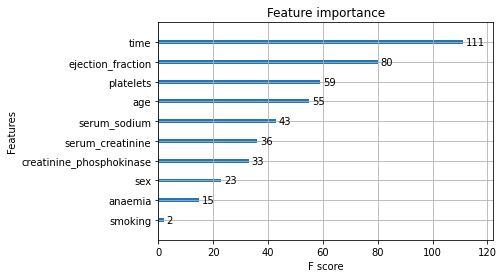

In [34]:
from xgboost import plot_importance
# xgb.feature_importances_ 
plot_importance(xgb1)
plt.show()

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1,random_state=0) 
gbdt.fit(X_train, y_train) 

pred_gdbt = gbdt.predict(X_test) 
evaluating_model(y_test, pred_gdbt)

Accuracy score =  0.8555555555555555
Precision_score =  0.8571428571428571
Recall Score =  0.6428571428571429
Confusion matrix =  [[59  3]
 [10 18]]


#Choosing and saving best model

In [36]:
# we will choose XGboost 

import joblib 
joblib.dump(xgb1, 'model.pkl') 
model = joblib.load('model.pkl' ) 
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])